<a href="https://colab.research.google.com/github/BanavathGanesh/Bike_Shering_Demand_Prediction/blob/main/Bike_Shering_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT UNDERSTANDING**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. Data Description The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information

# **Seoul Bike Sharing Demand Prediction**

**Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:**

**Date** : year-month-day

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - Hour of he day

**Temperature**-Temperature in Celsius

**Humidity** - %

**Windspeed** - m/s

**Visibility** - 10m

**Dew point temperature** - Celsius

**Solar radiation** - MJ/m2

**Rainfall** - mm

**Snowfall** - cm

**Seasons** - Winter, Spring, Summer, Autumn

**Holiday** - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loaing Dataset
df =  pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding='ISO-8859-1')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [3]:
# Basic observations and Data Understanding

print (f"Given dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Given dataset contains 8760 rows and 14 columns.


In [4]:
# Checking first 5 rows of data set
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Checking last 5 rows of the data set
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
# Checking five random rows of the data set
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4511  06/06/2018               1251    23             20.1           77   
7187  26/09/2018               1152    11             20.5           42   
2857  30/03/2018                401     1             11.4           77   
5864  02/08/2018               1579     8             31.6           50   
7948  28/10/2018                148     4              6.8           65   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4511               3.1               797                       15.9   
7187               2.1              1981                        7.1   
2857               0.7               466                        7.5   
5864               1.1              1943                       19.9   
7948               1.1              2000                        0.6   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4511                     0.00           0.0            0.0  Summer   
7187                     1.59           0.0            0.0  Autumn   
2857                     0.00           0.0            0.0  Spring   
5864                     0.76           0.0            0.0  Summer   
7948                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
4511     Holiday             Yes  
7187  No Holiday             Yes  
2857  No Holiday             Yes  
5864  No Holiday             Yes  
7948  No Holiday             Yes

In [7]:
df.shape

(8760, 14)

In [8]:
# Understanding the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# descrpitive statistical data of numerical columns
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [10]:
# Summary of Catagorical DATA
df.describe(include="object").T

count unique         top  freq
Date             8760    365  01/12/2017    24
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning Day  8760      2         Yes  8465

In [11]:
# Summary of Data

df.describe(include="all")

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [12]:
# Checking the correlation between variables
df.corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

In [13]:
# Checking the missing values
df.isnull()

Date  Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  \
0     False              False  False            False        False   
1     False              False  False            False        False   
2     False              False  False            False        False   
3     False              False  False            False        False   
4     False              False  False            False        False   
...     ...                ...    ...              ...          ...   
8755  False              False  False            False        False   
8756  False              False  False            False        False   
8757  False              False  False            False        False   
8758  False              False  False            False        False   
8759  False              False  False            False        False   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                False             False                      False   
1                False             False                      False   
2                False             False                      False   
3                False             False                      False   
4                False             False                      False   
...                ...               ...                        ...   
8755             False             False                      False   
8756             False             False                      False   
8757             False             False                      False   
8758             False             False                      False   
8759             False             False                      False   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                       False         False          False    False    False   
1                       False         False          False    False    False   
2                       False         False          False    False    False   
3                       False         False          False    False    False   
4                       False         False          False    False    False   
...                       ...           ...            ...      ...      ...   
8755                    False         False          False    False    False   
8756                    False         False          False    False    False   
8757                    False         False          False    False    False   
8758                    False         False          False    False    False   
8759                    False         False          False    False    False   

      Functioning Day  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
8755            False  
8756            False  
8757            False  
8758            False  
8759            False  

[8760 rows x 14 columns]

**Pre-processing the dataset**

In [14]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [15]:
# Checking for presence of any duplicate values
len(df[df.duplicated])

0

In [16]:
# Modifying Date format to make it user friendly(To analyse the impact of month and days on dependent variable)
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [18]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  year  month       day  
0     No Holiday             Yes  2017      1  Thursday  
1     No Holiday             Yes  2017      1  Thursday  
2     No Holiday             Yes  2017      1  Thursday  
3     No Holiday             Yes  2017      1  Thursday  
4     No Holiday             Yes  2017      1  Thursday  
...          ...             ...   ...    ...       ...  
8755  No Holiday             Yes  2018     11    Friday  
8756  No Holiday             Yes  2018     11    Friday  
8757  No Holiday             Yes  2018     11    Friday  
8758  No Holiday             Yes  2018     11    Friday  
8759  No Holiday             Yes  2018     11    Friday  

[8760 rows x 17 columns]

In [19]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

df = df.drop(columns=['Date','day','year'],axis=1)

In [20]:
# Checking the data types after modification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [21]:
df.sample(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
2531                557    11              8.2           45               2.4   
8580                664    12              5.5           20               1.4   
4401               1005     9             23.3           43               1.2   
1215                406    15              6.3           55               3.0   
2944               1218    16             23.0           47               4.1   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
2531              1992                       -3.0                     2.38   
8580              1992                      -15.7                     1.85   
4401              1257                       10.0                     1.91   
1215               355                       -2.0                     0.68   
2944              1417                       11.0                     2.00   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
2531           0.0            0.0  Spring  No Holiday             Yes      3   
8580           0.0            0.0  Autumn  No Holiday             Yes     11   
4401           0.0            0.0  Summer  No Holiday             Yes      2   
1215           0.0            0.0  Winter  No Holiday             Yes      1   
2944           0.0            0.0  Spring  No Holiday             Yes      2   

      weekdays_weekend  
2531                 0  
8580                 0  
4401                 0  
1215                 1  
2944                 1

In [22]:
# Checking the value counts of new column
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [23]:
# Checking unique values
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [24]:
#Change the int64 column into catagory column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] =df[col].astype('category')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [26]:
df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [27]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [28]:
df.rename(columns={"Rented Bike Count": "Rented_Bike_Count", "Temperature(°C)": "Temp_Celsius", "Humidity(%)": "Humidity_Percentage", "Wind speed (m/s)": "Wind_Speed_m_s", "Visibility (10m)": "Visibility_10m", "Dew point temperature(°C)": "Dew_Point_Temp_Celsius", "Solar Radiation (MJ/m2)": "Solar_Radiation_MJ_per_m2", "Rainfall(mm)": "Rainfall_mm", "Snowfall (cm)": "Snowfall_cm", "Functioning Day": "Functioning_Day"}, inplace=True)

# **EDA**

## **Univariate**

# ***CATEGORICAL***

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

In [30]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

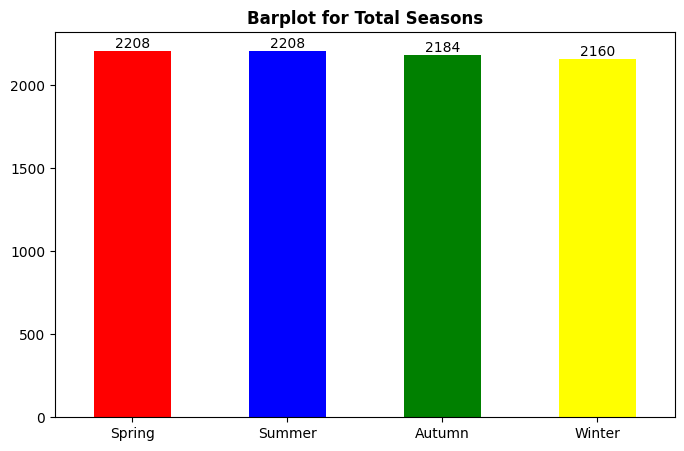

In [31]:
# Set the figure size to 8 inches in width and 6 inches in height
plt.figure(figsize=(8, 5))

# Create a bar plot using the value counts of the 'market_segment' column
ax = df["Seasons"].value_counts().plot(kind="bar", color=["red", "blue", "green", "yellow"])

# Add labels to the bars with their respective counts
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)

# Set the title of the plot
plt.title('Barplot for Total Seasons', fontweight='bold')

# Rotate the x-axis tick labels by 30 degrees to improve readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

**Infarence**

1. The 'seasons' column shows a balanced distribution.

2. Spring and Summer each have 2208 occurrences.

3. Autumn follows closely with 2184, and Winter has 2160, indicating even representation across the seasons in the dataset.

In [32]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

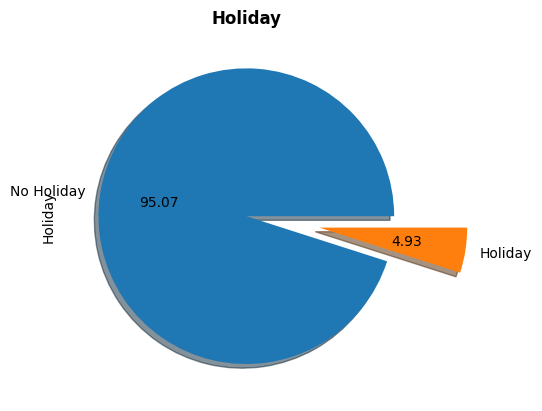

In [33]:
#plt.figure(figsize=(7,5))
df["Holiday"].value_counts().plot(kind="pie",autopct="%.2f",explode=(0,0.5),shadow=True)
plt.title("Holiday", fontweight='bold')
plt.show()

**Infarence**

* The pie chart analysis reveals that within the 'Holiday' and 'No Holiday' categories, 'No Holiday' takes the majority share in the 'Holiday' column, indicating a higher prevalence of non-holiday instances in the dataset.

* The 'Holiday' category demonstrates the smallest proportion within the 'Holiday' column, constituting only 4.93% of the overall total.

* The 'Holiday' part makes up just 95.07% of the total, showing that most of the entries fall into the 'No Holiday' category.

In [34]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

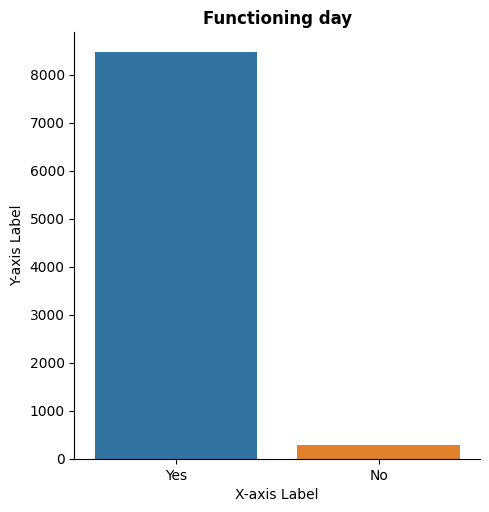

In [35]:
# Create a categorical plot using catplot
sns.catplot(x="Functioning_Day", data=df, kind="count")

# Add labels and titles (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Functioning day", fontweight='bold')

# Show the plot
plt.show()

In [36]:
# numerical variables
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Temp_Celsius', 'Humidity_Percentage',
       'Wind_Speed_m_s', 'Visibility_10m', 'Dew_Point_Temp_Celsius',
       'Solar_Radiation_MJ_per_m2', 'Rainfall_mm', 'Snowfall_cm'],
      dtype='object')

In [37]:
df['Temp_Celsius'].value_counts()

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temp_Celsius, Length: 546, dtype: int64

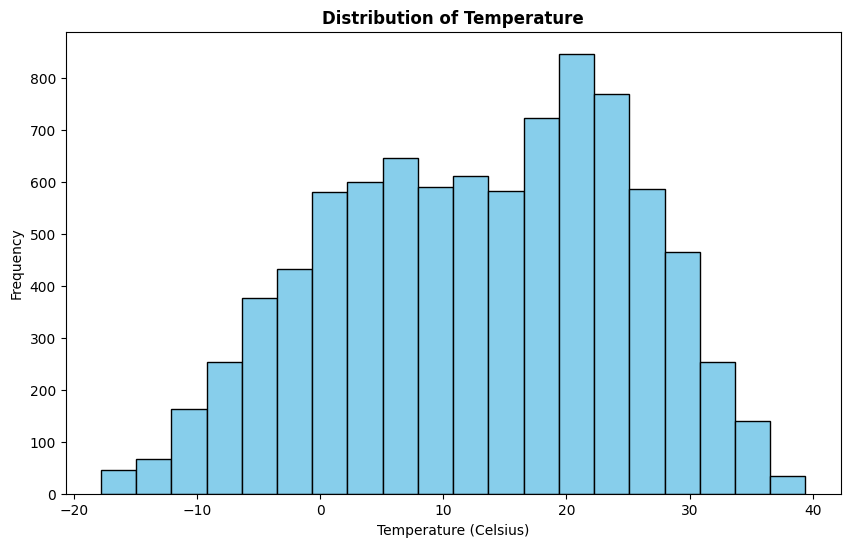

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temp_Celsius'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature', fontweight='bold')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()


In [39]:
df['Humidity_Percentage'].value_counts()

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity_Percentage, Length: 90, dtype: int64

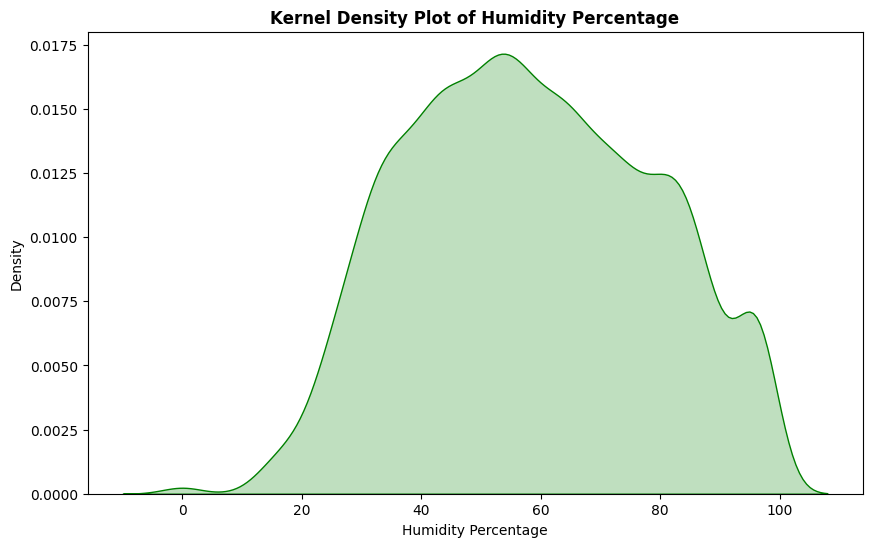

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Humidity_Percentage'], fill=True, color='green')
plt.title('Kernel Density Plot of Humidity Percentage', fontweight='bold')
plt.xlabel('Humidity Percentage')
plt.ylabel('Density')
plt.show()


In [41]:
df['Wind_Speed_m_s'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind_Speed_m_s, Length: 65, dtype: int64

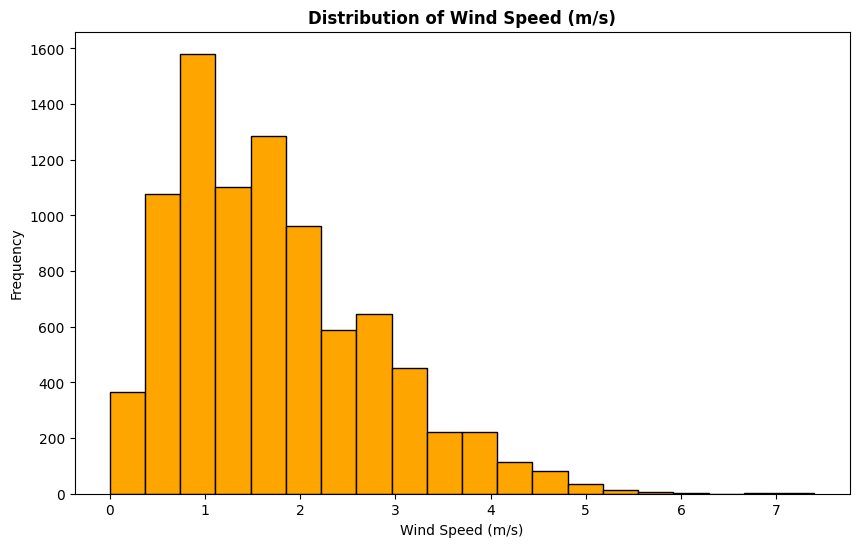

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['Wind_Speed_m_s'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Wind Speed (m/s)', fontweight='bold')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


In [43]:
# numerical variables
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Temp_Celsius', 'Humidity_Percentage',
       'Wind_Speed_m_s', 'Visibility_10m', 'Dew_Point_Temp_Celsius',
       'Solar_Radiation_MJ_per_m2', 'Rainfall_mm', 'Snowfall_cm'],
      dtype='object')

In [44]:
df['Visibility_10m'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility_10m, Length: 1789, dtype: int64

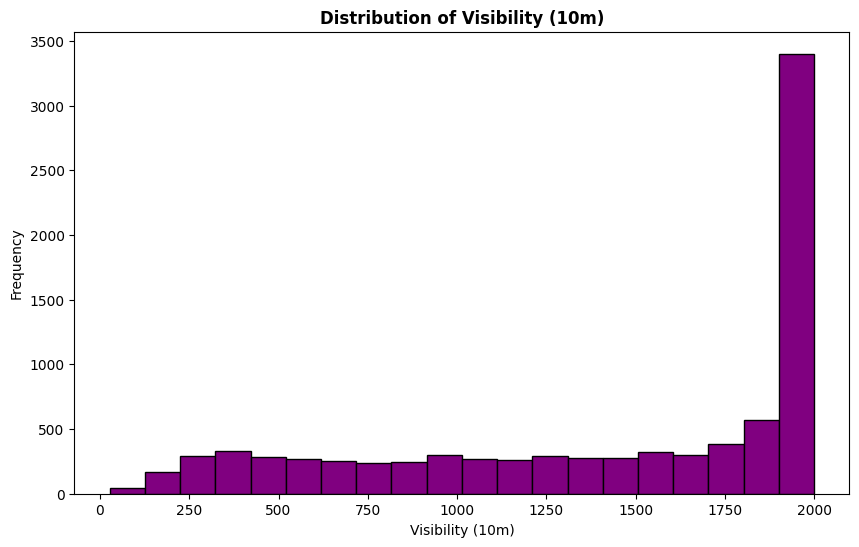

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Visibility_10m'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Visibility (10m)',fontweight='bold')
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.show()


In [46]:
df['Dew_Point_Temp_Celsius'].value_counts()

 0.0     60
 21.1    43
 14.3    40
 21.2    40
 8.9     39
         ..
-28.3     1
-29.8     1
-23.8     1
-29.1     1
 25.7     1
Name: Dew_Point_Temp_Celsius, Length: 556, dtype: int64

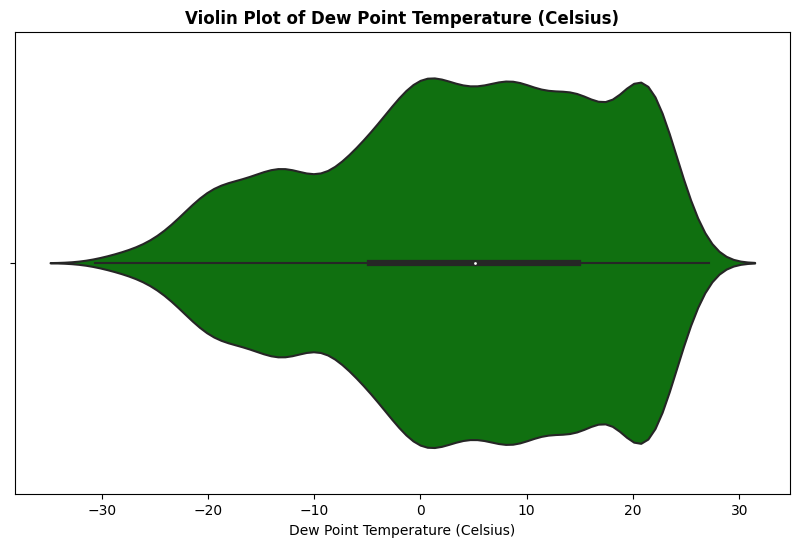

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Dew_Point_Temp_Celsius'], color='green')
plt.title('Violin Plot of Dew Point Temperature (Celsius)', fontweight='bold')
plt.xlabel('Dew Point Temperature (Celsius)')
plt.show()


In [48]:
df['Rainfall_mm'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall_mm, Length: 61, dtype: int64

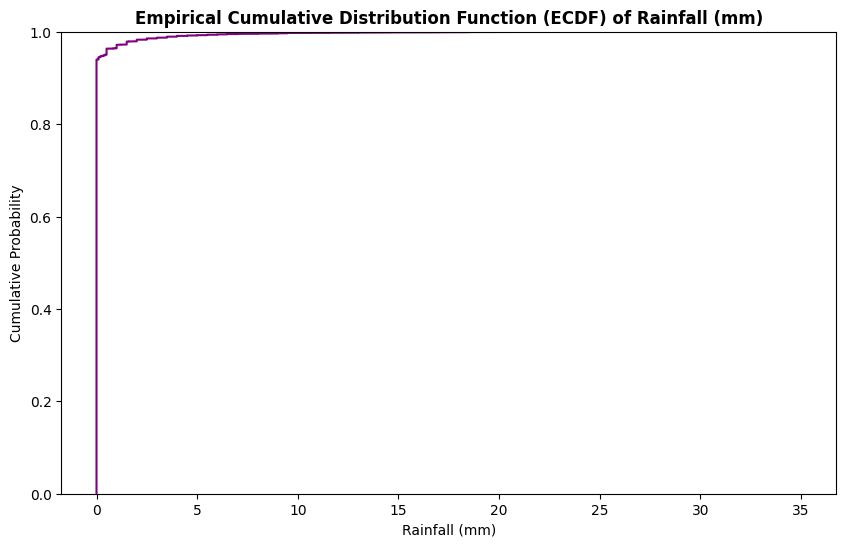

In [49]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Rainfall_mm', color='purple')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Rainfall (mm)', fontweight='bold')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Cumulative Probability')
plt.show()


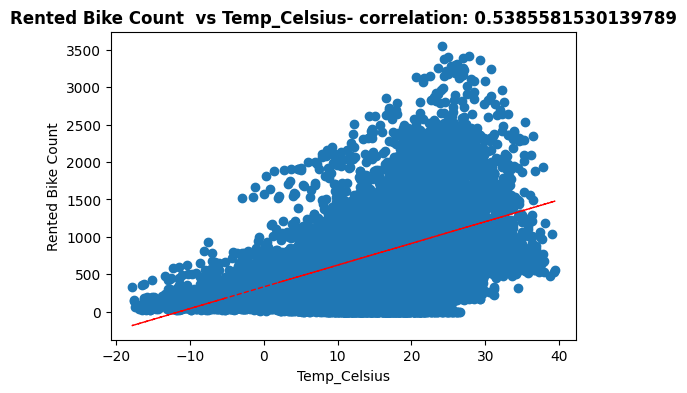

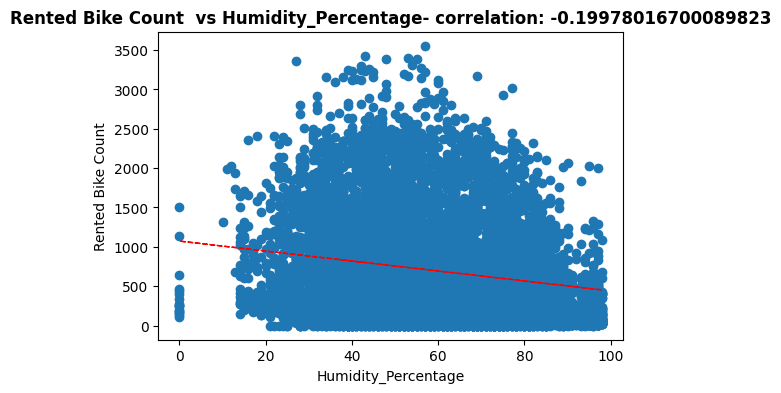

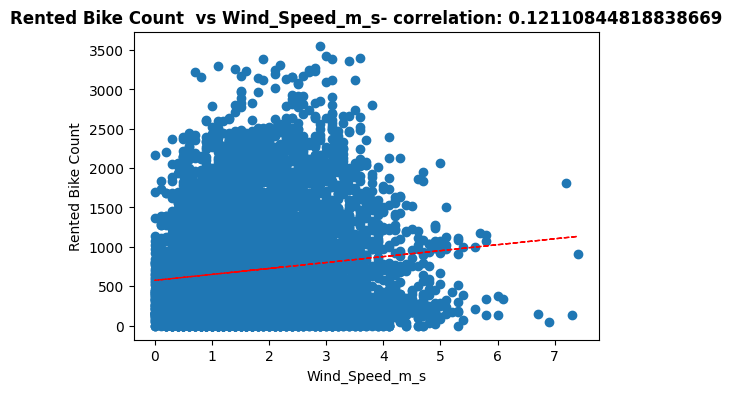

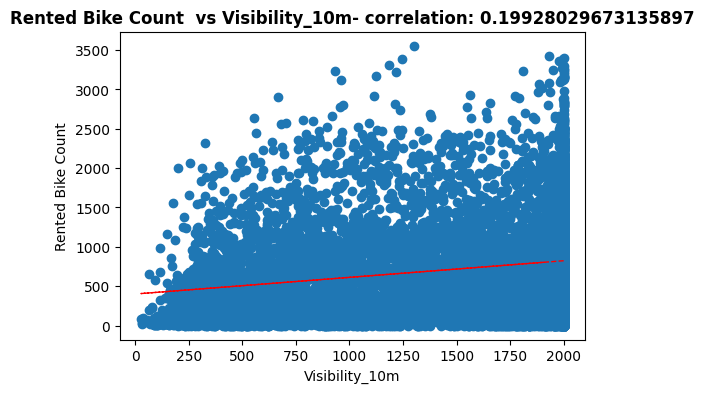

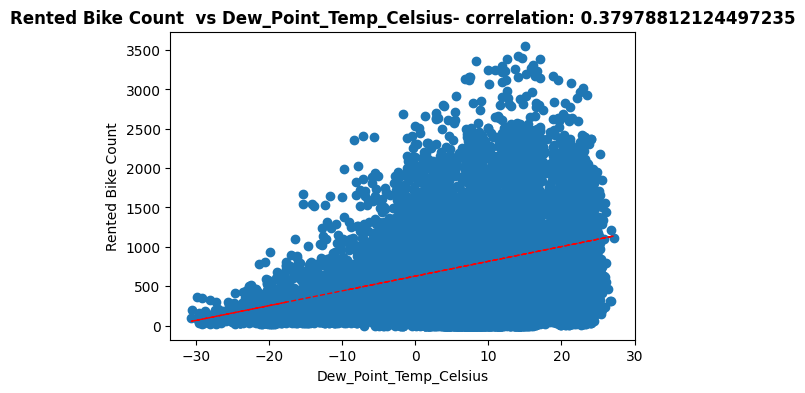

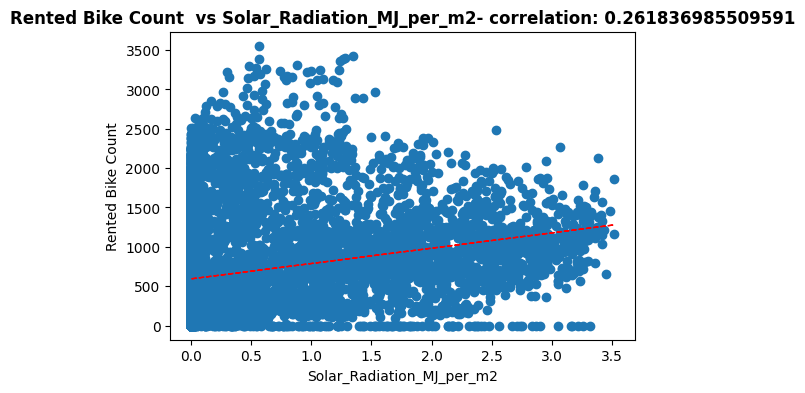

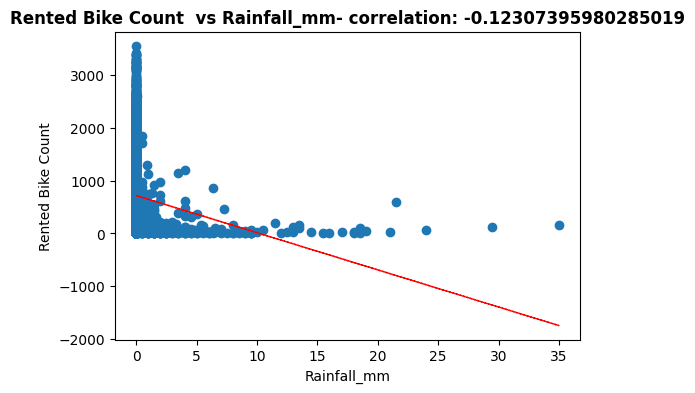

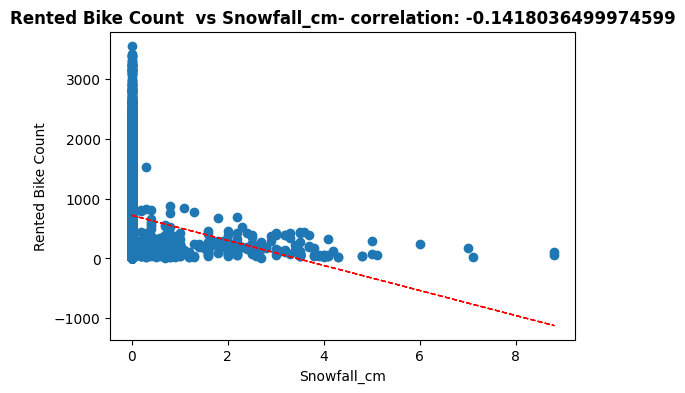

In [50]:
 # finding relationship bewtween target variable to each independent variable

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count  vs ' + col + '- correlation: ' + str(correlation), fontweight='bold')
    z = np.polyfit(df[col], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    #plt.plot(df[col], color='red',y_hat, "r--", lw=1)
    plt.plot(df[col], y_hat, color='red', linestyle='--', lw=1)
    plt.show()

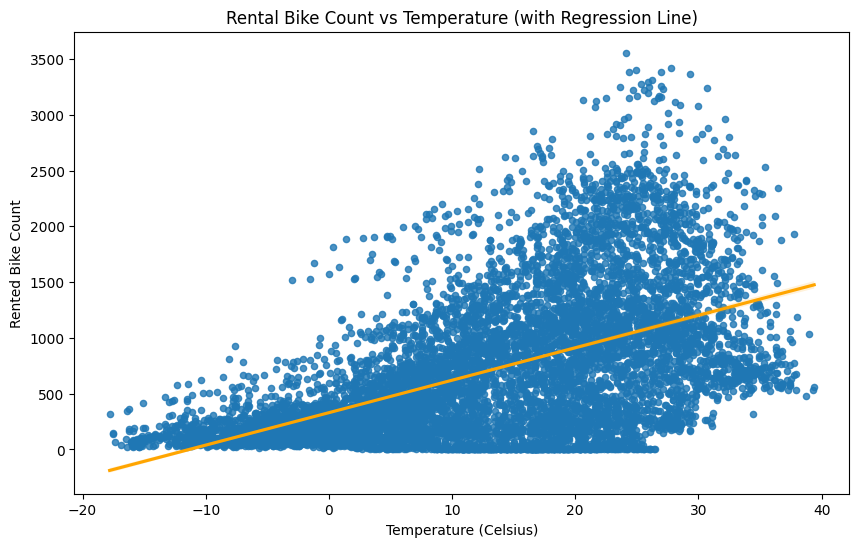

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Temp_Celsius', y='Rented_Bike_Count', data=df, scatter_kws={'s': 20}, line_kws={'color': 'orange'})
plt.title('Rental Bike Count vs Temperature (with Regression Line)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Rented Bike Count')
plt.show()

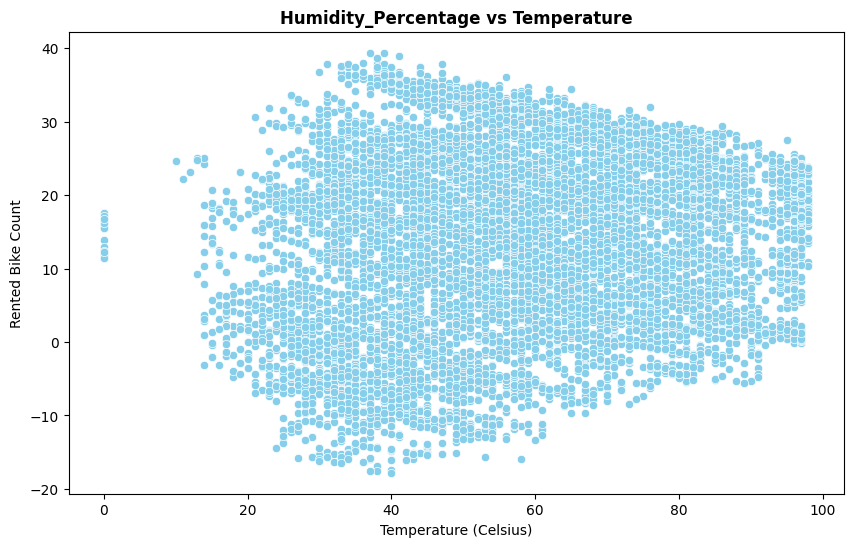

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity_Percentage', y='Temp_Celsius', data=df, color='skyblue')
plt.title('Humidity_Percentage vs Temperature', fontweight='bold')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Rented Bike Count')
plt.show()

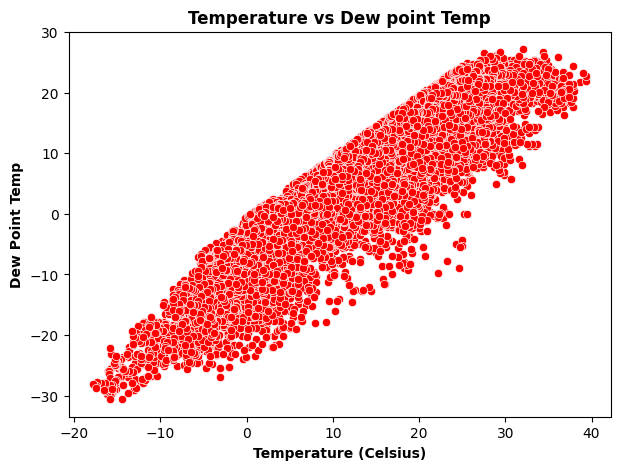

In [53]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Temp_Celsius', y='Dew_Point_Temp_Celsius', data=df, color='red')
plt.title('Temperature vs Dew point Temp', fontweight='bold')
plt.xlabel('Temperature (Celsius)', fontweight='bold')
plt.ylabel('Dew Point Temp', fontweight='bold')
plt.show()

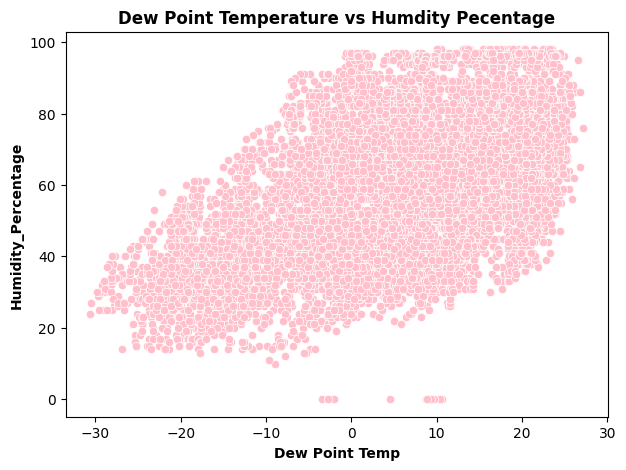

In [54]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Dew_Point_Temp_Celsius', y='Humidity_Percentage', data=df, color='pink')
plt.title('Dew Point Temperature vs Humdity Pecentage', fontweight='bold')
plt.xlabel('Dew Point Temp', fontweight='bold')
plt.ylabel('Humidity_Percentage', fontweight='bold')
plt.show()

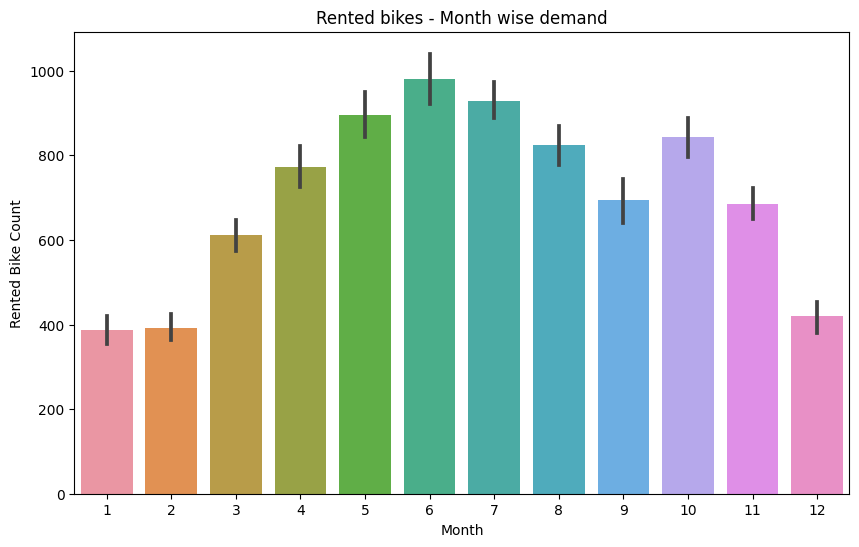

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='month', y='Rented_Bike_Count', ax=ax)
ax.set(title='Rented bikes - Month wise demand', xlabel='Month', ylabel='Rented Bike Count')
plt.show()

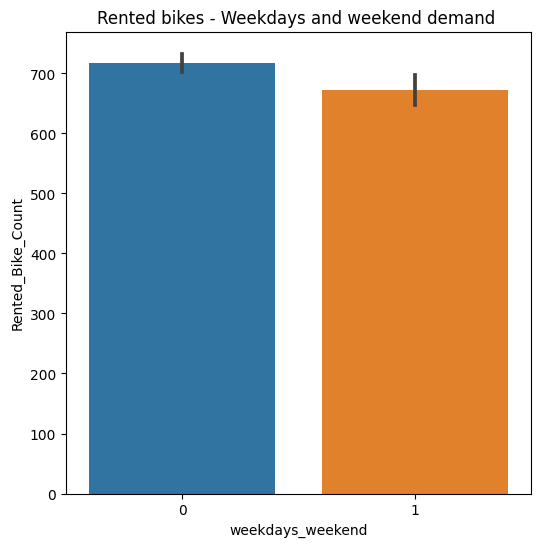

In [56]:
fig,ax = plt.subplots(figsize = (6,6))
sns.barplot(data = df,x ='weekdays_weekend',y = 'Rented_Bike_Count')
ax.set(title = 'Rented bikes - Weekdays and weekend demand ')
plt.show()

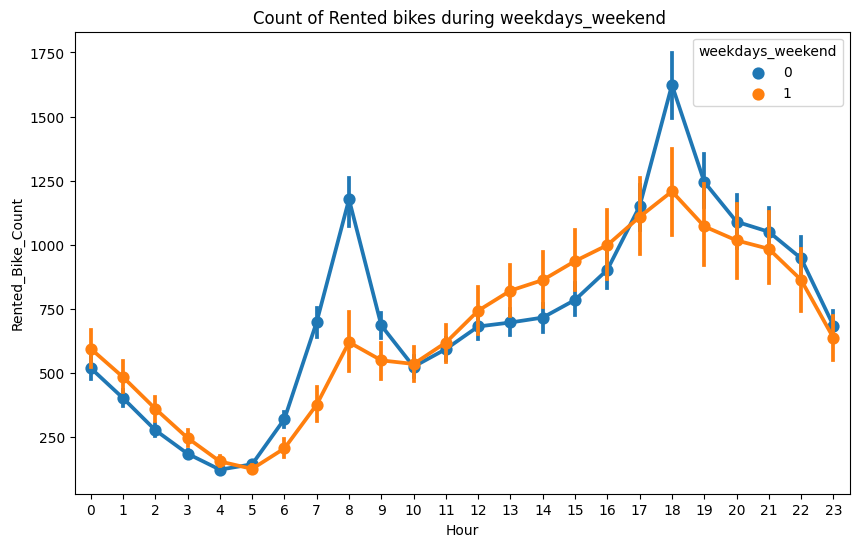

In [57]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (10,6))
sns.pointplot(data = df,x='Hour',y='Rented_Bike_Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes during weekdays_weekend ')
plt.show()

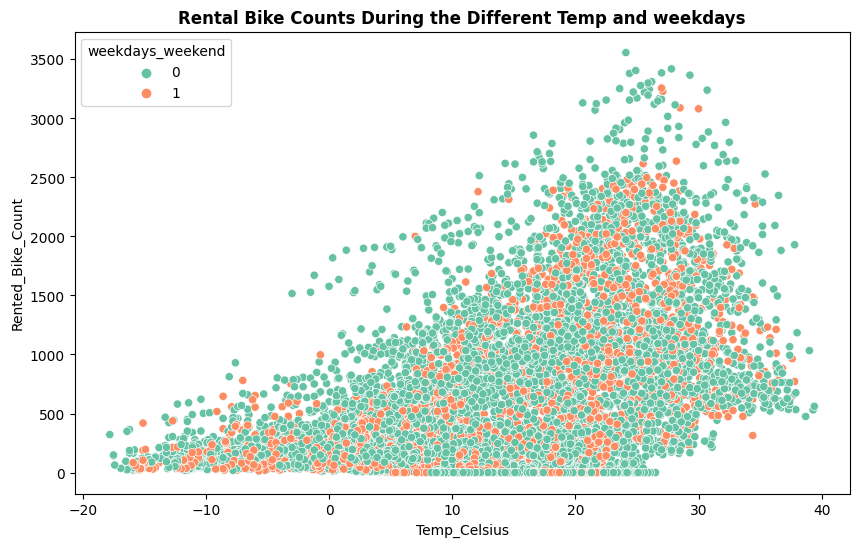

In [58]:
# Create the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temp_Celsius', y='Rented_Bike_Count', hue='weekdays_weekend',  data=df, palette='Set2')
plt.title('Rental Bike Counts During the Different Temp and weekdays', fontweight='bold')
# Display the plot
plt.show()

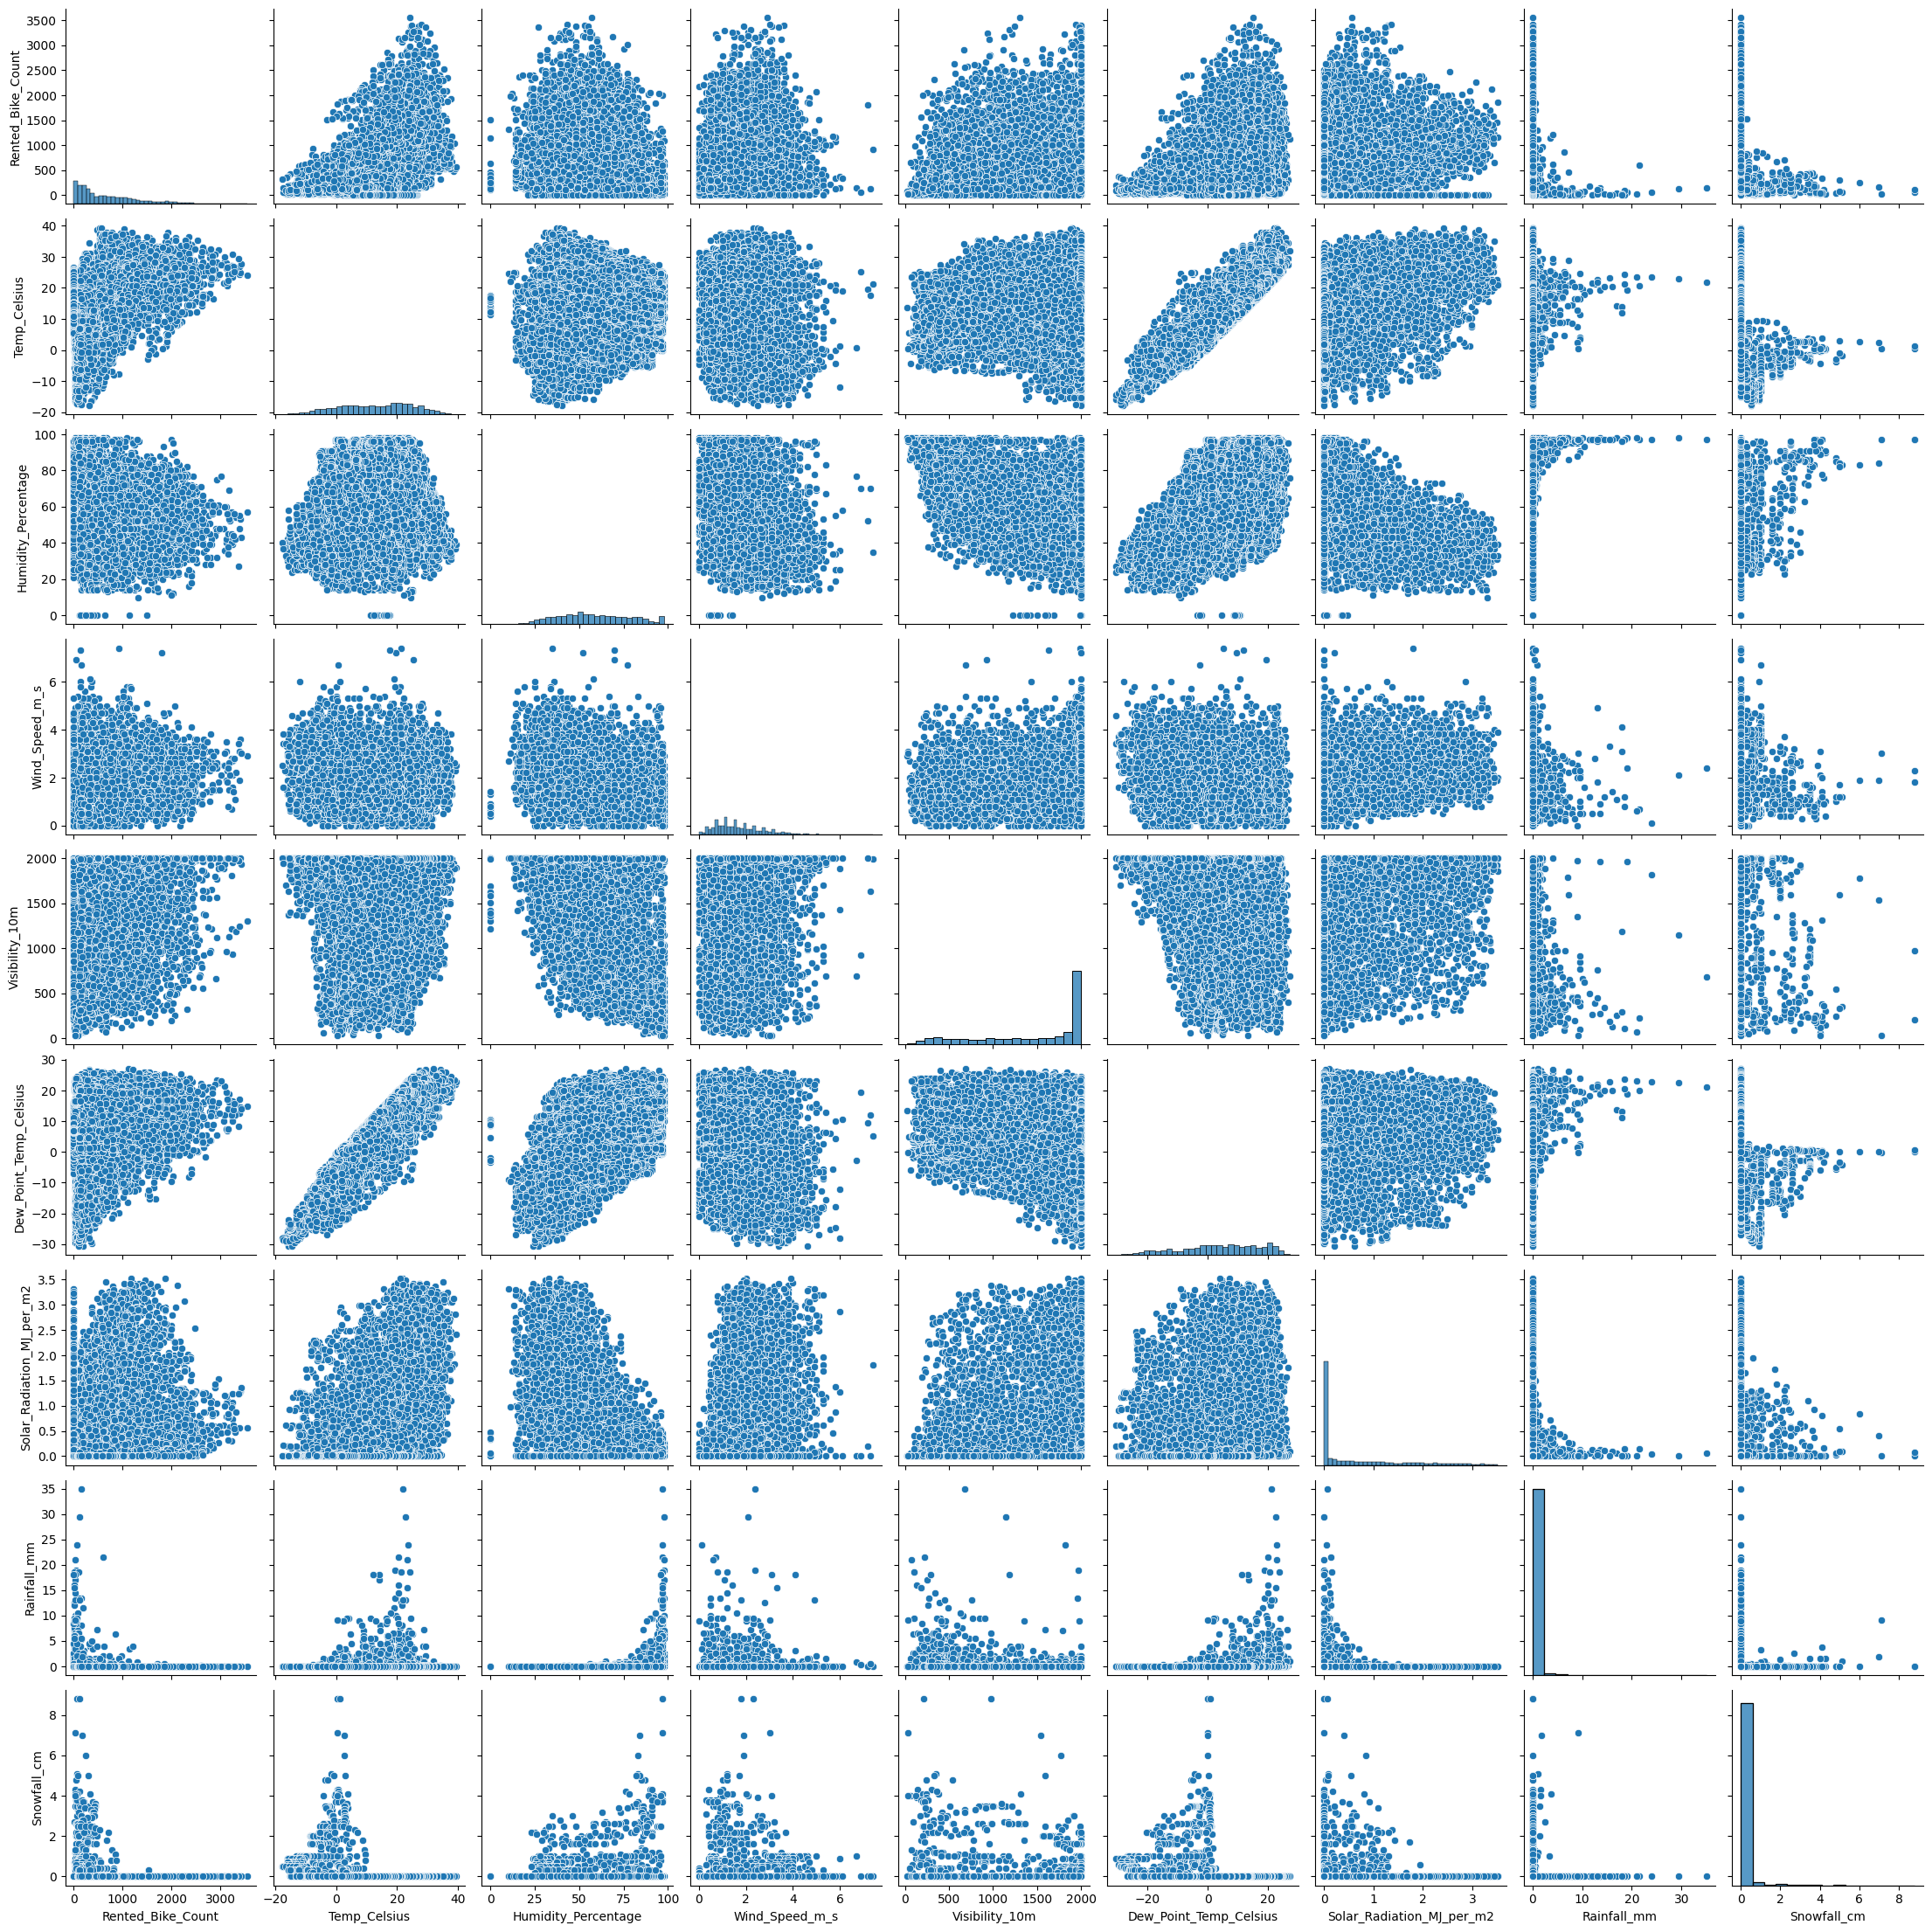

In [59]:
sns.pairplot(df)   #finding relationship each variable
plt.show()

In [60]:
df['Rented_Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

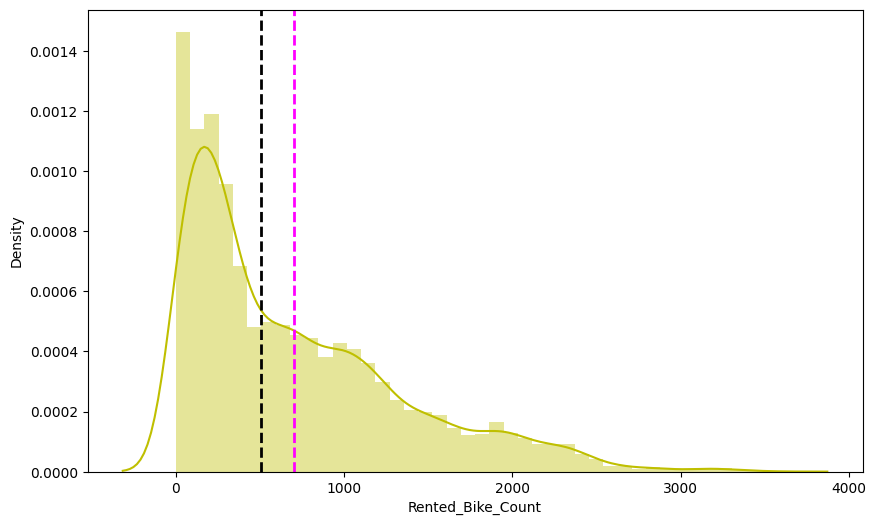

In [61]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

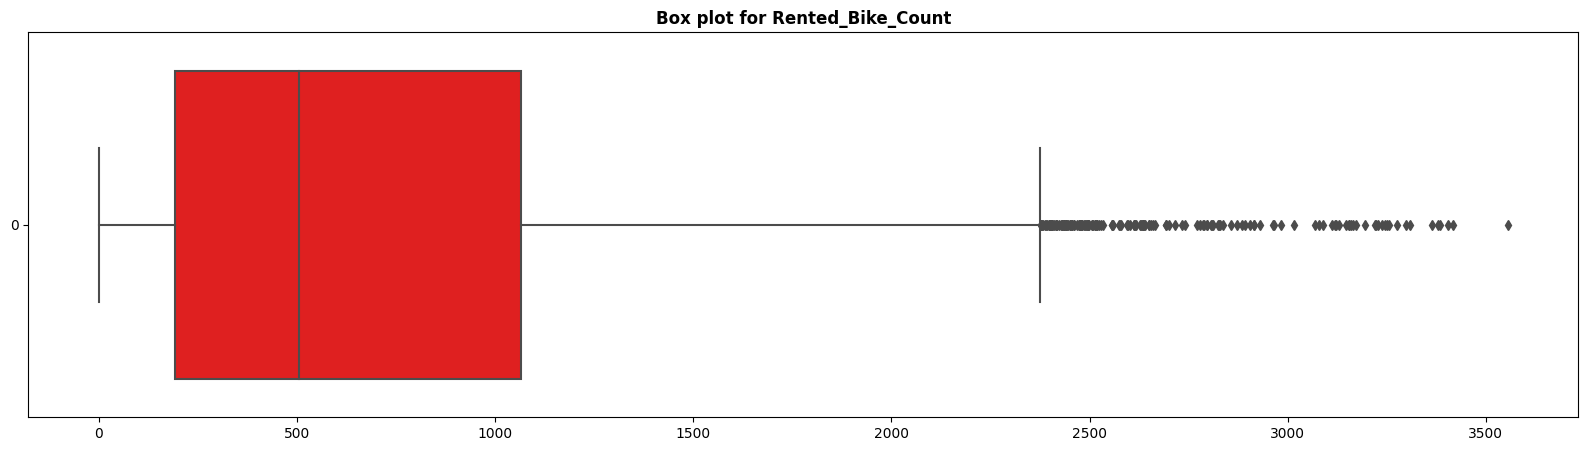

In [62]:
# Set the figure size to 20 inches in width and 5 inches in height
plt.figure(figsize=(20, 5))

# Create a box plot to visualize the distribution of the 'lead_time' variable
sns.boxplot(df['Rented_Bike_Count'], color='Red', orient='h')
plt.title('Box plot for Rented_Bike_Count', fontweight='bold')
# Display the plot
plt.show()

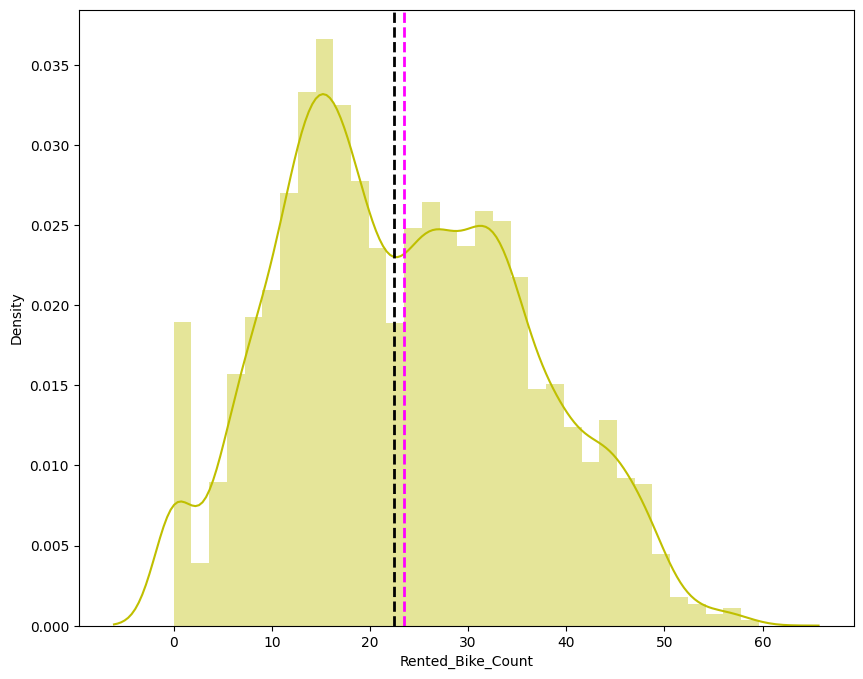

In [63]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

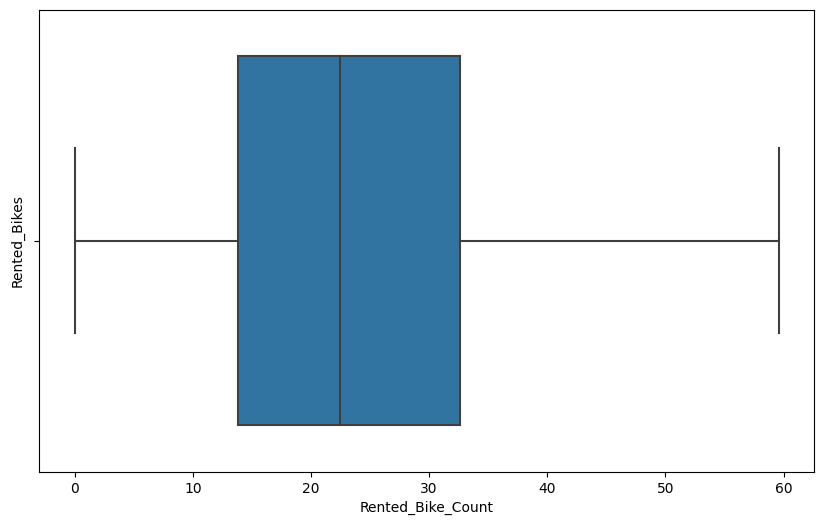

In [64]:
# After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bikes')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

# **Correlation Heatmap**

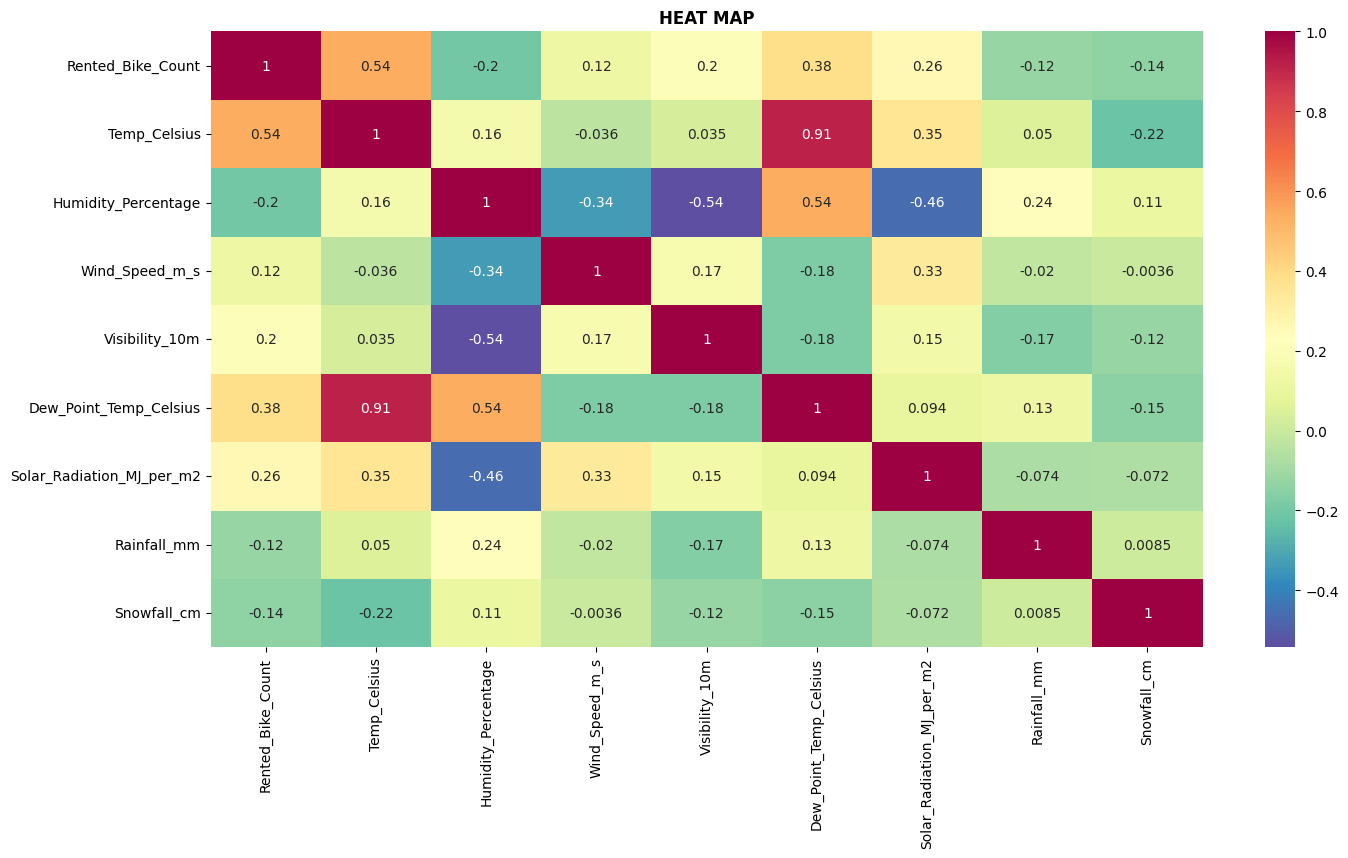

In [65]:
# heat map showing correlationship between one variable to another variable
plt.figure (figsize= (16,8))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP", fontweight = 'bold')
plt.show()

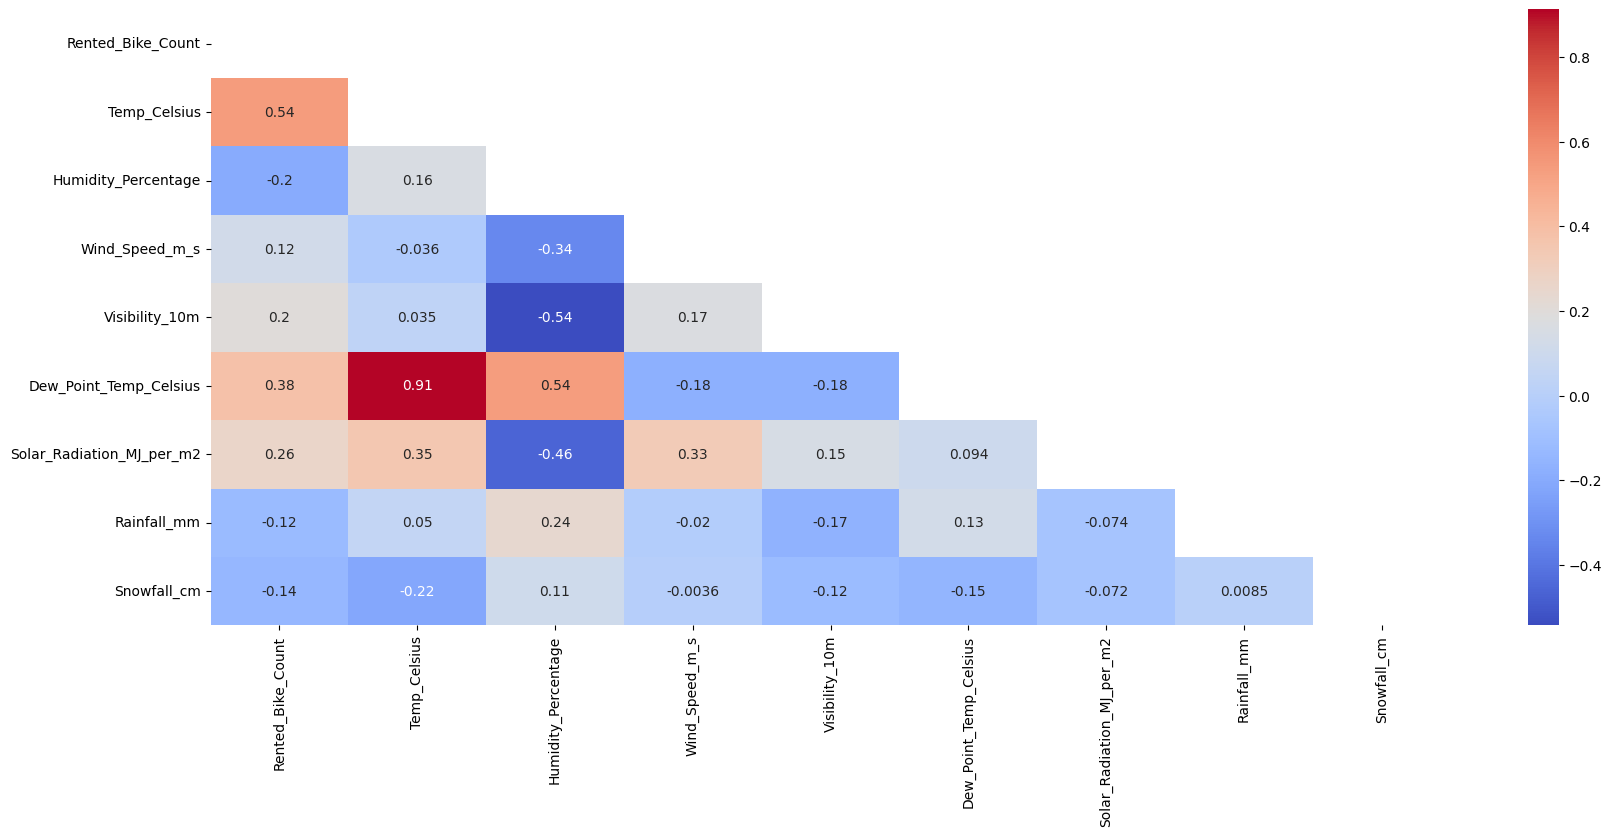

In [66]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')
plt.show()

In [67]:
df.head(1)

Rented_Bike_Count Hour  Temp_Celsius  Humidity_Percentage  Wind_Speed_m_s  \
0                254    0          -5.2                   37             2.2   

   Visibility_10m  Dew_Point_Temp_Celsius  Solar_Radiation_MJ_per_m2  \
0            2000                   -17.6                        0.0   

   Rainfall_mm  Snowfall_cm Seasons     Holiday Functioning_Day month  \
0          0.0          0.0  Winter  No Holiday             Yes     1   

  weekdays_weekend  
0                0

In [68]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [69]:
# finding multicollinearity to dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented_Bike_Count"]]])

variables        VIF
0               Temp_Celsius  29.075866
1        Humidity_Percentage   5.069743
2             Wind_Speed_m_s   4.517664
3             Visibility_10m   9.051931
4     Dew_Point_Temp_Celsius  15.201989
5  Solar_Radiation_MJ_per_m2   2.821604
6                Rainfall_mm   1.079919
7                Snowfall_cm   1.118903

In [70]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented_Bike_Count","Temp_Celsius"]]])

variables       VIF
0        Humidity_Percentage  5.049297
1             Wind_Speed_m_s  4.265415
2             Visibility_10m  4.623490
3     Dew_Point_Temp_Celsius  1.655311
4  Solar_Radiation_MJ_per_m2  1.901297
5                Rainfall_mm  1.079157
6                Snowfall_cm  1.111247

In [71]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented_Bike_Count","Temp_Celsius","Functioning_Day"]]])

variables       VIF
0        Humidity_Percentage  5.049297
1             Wind_Speed_m_s  4.265415
2             Visibility_10m  4.623490
3     Dew_Point_Temp_Celsius  1.655311
4  Solar_Radiation_MJ_per_m2  1.901297
5                Rainfall_mm  1.079157
6                Snowfall_cm  1.111247

In [72]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented_Bike_Count","Temp_Celsius","Functioning_Day","Holiday"]]])

variables       VIF
0        Humidity_Percentage  5.049297
1             Wind_Speed_m_s  4.265415
2             Visibility_10m  4.623490
3     Dew_Point_Temp_Celsius  1.655311
4  Solar_Radiation_MJ_per_m2  1.901297
5                Rainfall_mm  1.079157
6                Snowfall_cm  1.111247

In [73]:
# selected features
numerical_features = ["Humidity_Percentage","Wind_Speed_m_s","Visibility_10m","Dew_Point_Temp_Celsius","Solar_Radiation_MJ_per_m2","Rainfall_mm","Snowfall_cm"]


In [74]:
# extending of features
features = numerical_features.copy()
features.extend(["Seasons","Holiday","Functioning_Day"])

In [75]:
# importig label encoder and convert categorical to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
i

'weekdays_weekend'

In [76]:
# these are selected features
features

['Humidity_Percentage',
 'Wind_Speed_m_s',
 'Visibility_10m',
 'Dew_Point_Temp_Celsius',
 'Solar_Radiation_MJ_per_m2',
 'Rainfall_mm',
 'Snowfall_cm',
 'Seasons',
 'Holiday',
 'Functioning_Day']

In [77]:
# copying of data in another variable
df_pr=df.copy()
df_pr

Rented_Bike_Count Hour  Temp_Celsius  Humidity_Percentage  \
0                   254    0          -5.2                   37   
1                   204    1          -5.5                   38   
2                   173    2          -6.0                   39   
3                   107    3          -6.2                   40   
4                    78    4          -6.0                   36   
...                 ...  ...           ...                  ...   
8755               1003   19           4.2                   34   
8756                764   20           3.4                   37   
8757                694   21           2.6                   39   
8758                712   22           2.1                   41   
8759                584   23           1.9                   43   

      Wind_Speed_m_s  Visibility_10m  Dew_Point_Temp_Celsius  \
0                2.2            2000                   -17.6   
1                0.8            2000                   -17.6   
2                1.0            2000                   -17.7   
3                0.9            2000                   -17.6   
4                2.3            2000                   -18.6   
...              ...             ...                     ...   
8755             2.6            1894                   -10.3   
8756             2.3            2000                    -9.9   
8757             0.3            1968                    -9.9   
8758             1.0            1859                    -9.8   
8759             1.3            1909                    -9.3   

      Solar_Radiation_MJ_per_m2  Rainfall_mm  Snowfall_cm  Seasons  Holiday  \
0                           0.0          0.0          0.0        3        1   
1                           0.0          0.0          0.0        3        1   
2                           0.0          0.0          0.0        3        1   
3                           0.0          0.0          0.0        3        1   
4                           0.0          0.0          0.0        3        1   
...                         ...          ...          ...      ...      ...   
8755                        0.0          0.0          0.0        0        1   
8756                        0.0          0.0          0.0        0        1   
8757                        0.0          0.0          0.0        0        1   
8758                        0.0          0.0          0.0        0        1   
8759                        0.0          0.0          0.0        0        1   

      Functioning_Day month weekdays_weekend  
0                   1     1                0  
1                   1     1                0  
2                   1     1                0  
3                   1     1                0  
4                   1     1                0  
...               ...   ...              ...  
8755                1    11                0  
8756                1    11                0  
8757                1    11                0  
8758                1    11                0  
8759                1    11                0  

[8760 rows x 15 columns]

In [78]:
# all columns
df_pr.describe().columns

Index(['Rented_Bike_Count', 'Temp_Celsius', 'Humidity_Percentage',
       'Wind_Speed_m_s', 'Visibility_10m', 'Dew_Point_Temp_Celsius',
       'Solar_Radiation_MJ_per_m2', 'Rainfall_mm', 'Snowfall_cm', 'Seasons',
       'Holiday', 'Functioning_Day'],
      dtype='object')

# **TRAINING THE MODEL**

In [79]:
# All features store into Variable Xdf_pr[features]
X=df_pr[features]
X

Humidity_Percentage  Wind_Speed_m_s  Visibility_10m  \
0                      37             2.2            2000   
1                      38             0.8            2000   
2                      39             1.0            2000   
3                      40             0.9            2000   
4                      36             2.3            2000   
...                   ...             ...             ...   
8755                   34             2.6            1894   
8756                   37             2.3            2000   
8757                   39             0.3            1968   
8758                   41             1.0            1859   
8759                   43             1.3            1909   

      Dew_Point_Temp_Celsius  Solar_Radiation_MJ_per_m2  Rainfall_mm  \
0                      -17.6                        0.0          0.0   
1                      -17.6                        0.0          0.0   
2                      -17.7                        0.0          0.0   
3                      -17.6                        0.0          0.0   
4                      -18.6                        0.0          0.0   
...                      ...                        ...          ...   
8755                   -10.3                        0.0          0.0   
8756                    -9.9                        0.0          0.0   
8757                    -9.9                        0.0          0.0   
8758                    -9.8                        0.0          0.0   
8759                    -9.3                        0.0          0.0   

      Snowfall_cm  Seasons  Holiday  Functioning_Day  
0             0.0        3        1                1  
1             0.0        3        1                1  
2             0.0        3        1                1  
3             0.0        3        1                1  
4             0.0        3        1                1  
...           ...      ...      ...              ...  
8755          0.0        0        1                1  
8756          0.0        0        1                1  
8757          0.0        0        1                1  
8758          0.0        0        1                1  
8759          0.0        0        1                1  

[8760 rows x 10 columns]

In [80]:
from sklearn.preprocessing import RobustScaler
# Scalling of features
scaler = RobustScaler()
# Sclaing
X= scaler.fit_transform(X)

In [81]:
X

array([[-0.625     ,  0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.59375   , -0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.5625    , -0.35714286,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       ...,
       [-0.5625    , -0.85714286,  0.25471698, ..., -1.        ,
         0.        ,  0.        ],
       [-0.5       , -0.35714286,  0.15188679, ..., -1.        ,
         0.        ,  0.        ],
       [-0.4375    , -0.14285714,  0.1990566 , ..., -1.        ,
         0.        ,  0.        ]])

In [82]:
#dependent_variable=['Rented Bike Count']
#y=df_pr[dependent_variable].values # or

y = df_pr["Rented_Bike_Count"]
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [83]:
# Train Test Split
from sklearn.model_selection import train_test_split
import math

In [84]:
#Assign the value in X and Y
X = df_pr.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_pr['Rented_Bike_Count'])

In [85]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [86]:
print(X_train.shape) # shape of X , y
print(y_train.shape)

(7008, 14)
(7008,)


In [87]:
print(X_test.shape) # shape of X , y
print(y_test.shape)

(1752, 14)
(1752,)


# **LINEAR REGRESSION**

In [88]:
# importing necessary libraries for
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [89]:
# defining metrics

def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [90]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
regressor.intercept_ # intercept of linear regression B0

0.4163472825385419

In [92]:
regressor.coef_       # coefficents of linear regression like B1,B2,B3,B4......

array([ 5.00554099e-01,  1.61387597e-01, -2.53918748e-01,  9.17366936e-02,
        2.40973087e-04,  4.12745823e-01, -7.24244843e-01, -1.58353699e+00,
        1.33421737e-01, -2.08803765e+00,  3.17765754e+00,  2.87941106e+01,
        1.30535488e-01, -6.57017755e-01])

In [93]:
# Validating Assumptions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)

In [94]:
print(y_test_pred_lr) # predicted values of y_test

[29.19869894 34.21335366 36.70306149 ... 28.20929707  6.76675627
 37.02284116]


In [95]:
# actual y values
print(y_test)

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
          ...    
8307    11.045361
100      6.480741
6605    13.379088
1783    17.146428
6013    25.942244
Name: Rented_Bike_Count, Length: 1752, dtype: float64


In [96]:
# comparison  actual y_test values, and  y_predicted_values

pd.DataFrame ({"Actual_Values":y_test, "Predicted_values":y_test_pred_lr,"Error_value":(y_test-y_test_pred_lr)})

Actual_Values  Predicted_values  Error_value
6056      41.569219         29.198699    12.370520
5556      28.670542         34.213354    -5.542811
5990      25.651511         36.703061   -11.051551
7674      52.115257         36.210053    15.905204
3319      32.908965         21.461896    11.447069
...             ...               ...          ...
8307      11.045361         19.607144    -8.561783
100        6.480741         11.320810    -4.840069
6605      13.379088         28.209297   -14.830209
1783      17.146428          6.766756    10.379672
6013      25.942244         37.022841   -11.080598

[1752 rows x 3 columns]

In [97]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lr)


#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 53.20499869559992
RMSE is 7.294175669367987
MAE is 5.574797535709617
r2:0.6573663329544441
Adj_r2:0.6566803796670657


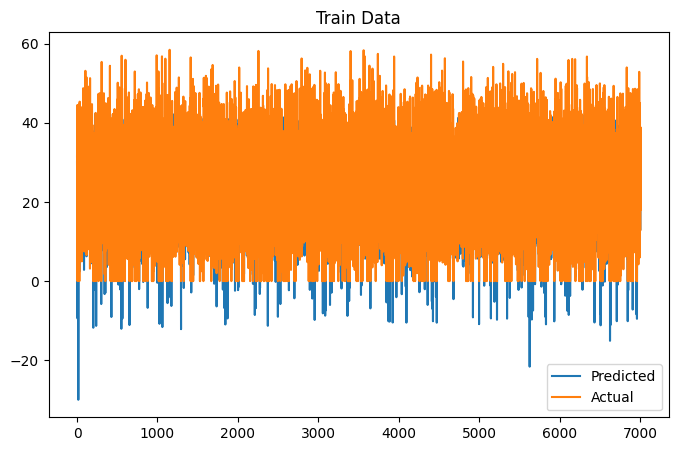

In [100]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_lr)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

* From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 65%

In [98]:
# Test dataset metrics
print_metrics(y_test, y_test_pred_lr)

# evaluating test data
 #Find R-squared value
r2 = r2_score(y_test, y_test_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")


MSE is 55.69581173677535
RMSE is 7.462962664838633
MAE is 5.667992682807563
r2:0.6381428959617073
Adj_r2:0.6352263735342254


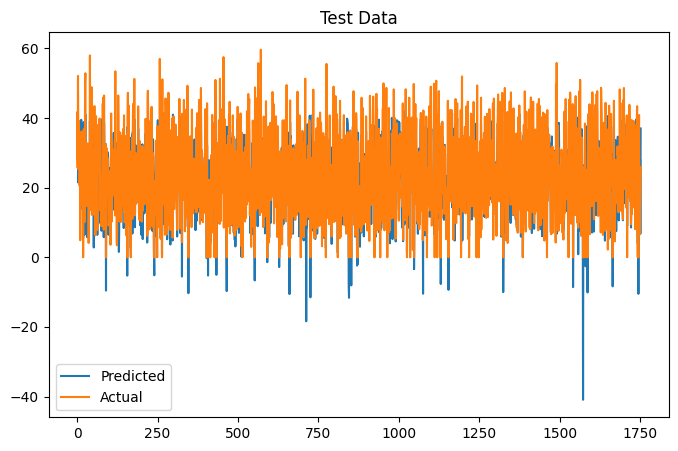

In [101]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_lr)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

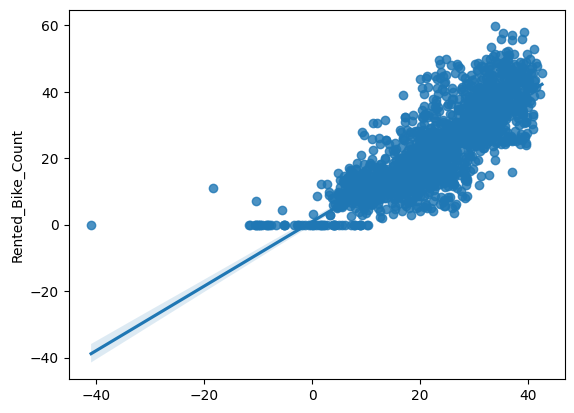

In [102]:
sns.regplot( y=y_test,x=y_test_pred_lr);

# **LASSO REGRESSION**

In [103]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.47647743109676377 0.472258771816244


In [104]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [105]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 81.94895615262985
RMSE : 9.052566274412458
MAE : 6.701721321265691
R2 : 0.472258771816244
Adjusted R2 : 0.46800524435822877


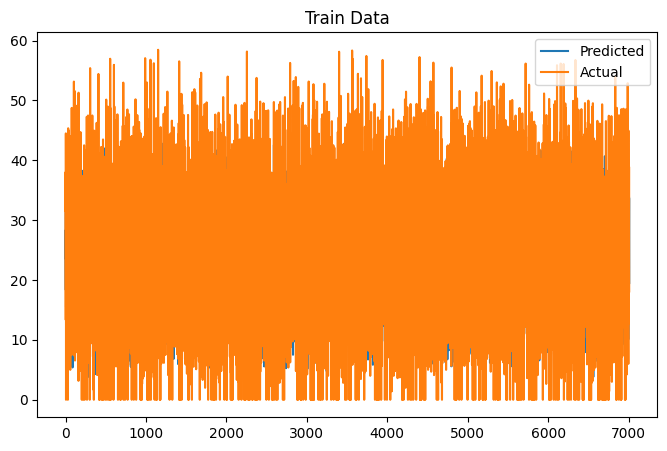

In [108]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_train_lasso)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

* From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 47%

In [109]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 80.5788089060207
RMSE : 8.97656999672039
MAE : 6.6092362001072225
R2 : 0.47647743109676377
Adjusted R2 : 0.47225790549823454


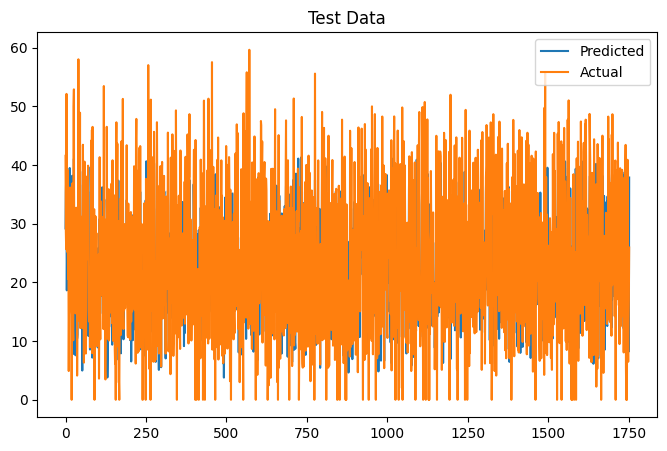

In [111]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_test_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

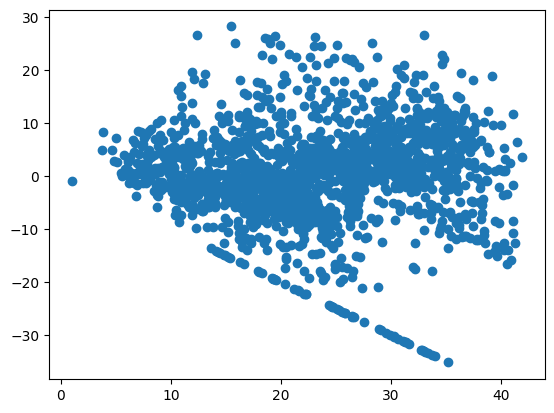

In [112]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso));

# **RIDGE REGRESSION**

In [113]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [114]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [115]:
#check the score
ridge.score(X_train, y_train)


0.6573662975693939

In [116]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [117]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.20500419027756
RMSE : 7.294176046016271
MAE : 5.5748366338640905
R2 : 0.6573662975693939
Adjusted R2 : 0.6546047133241271


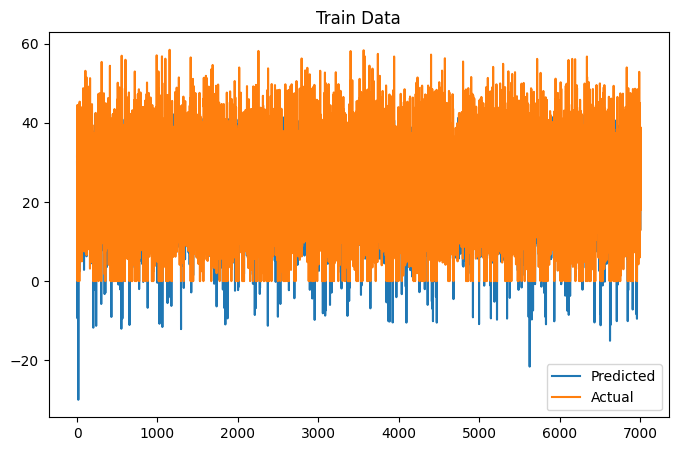

In [119]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_train_ridge)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

* From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 60%

In [120]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 55.694615503601945
RMSE : 7.462882519750793
MAE : 5.667975610981306
R2 : 0.6381506679190301
Adjusted R2 : 0.6352342081325398


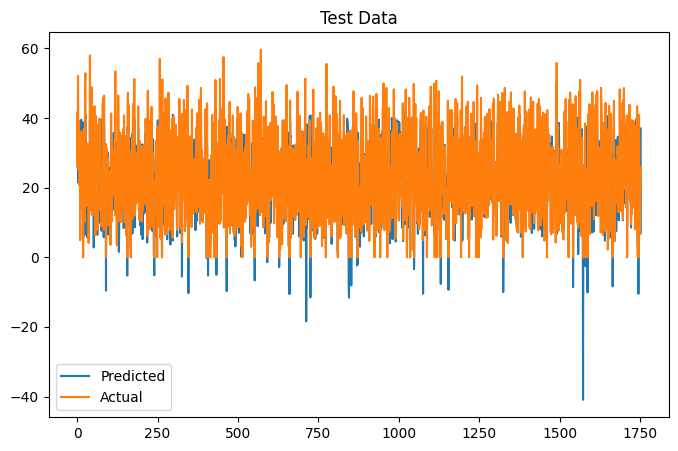

In [122]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_test_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

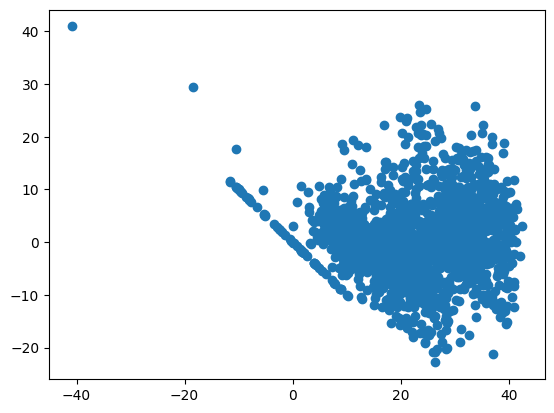

In [124]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge));

In [125]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [126]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [127]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8665018692830696
MSE : 20.729918142325868
RMSE : 4.553011985743709
MAE : 3.2694180212843658
R2 : 0.8665018692830696
Adjusted R2 : 0.8654258912577173


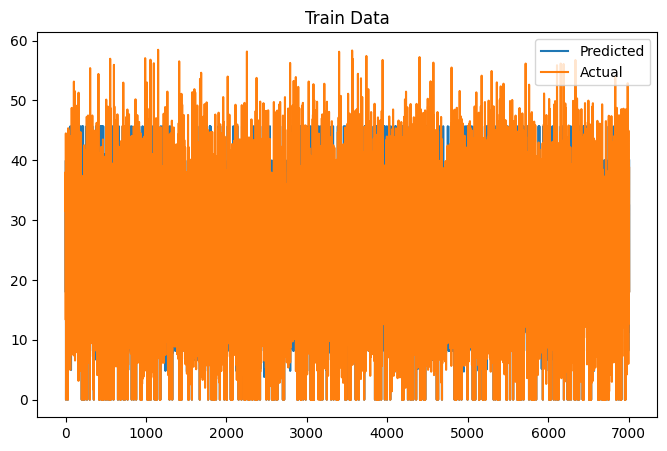

In [128]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_train_d)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [129]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 26.569638102308
RMSE : 5.15457448314679
MAE : 3.6208019604968555
R2 : 0.8273763861367989
Adjusted R2 : 0.8259850616727317


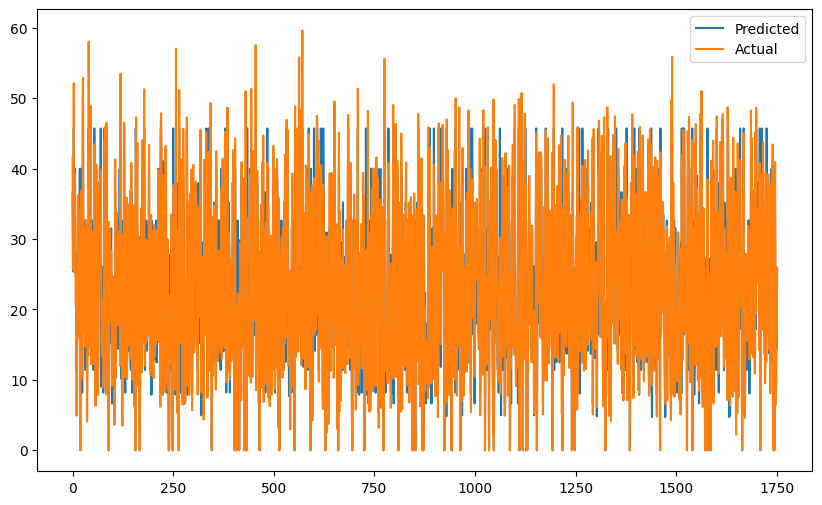

In [130]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

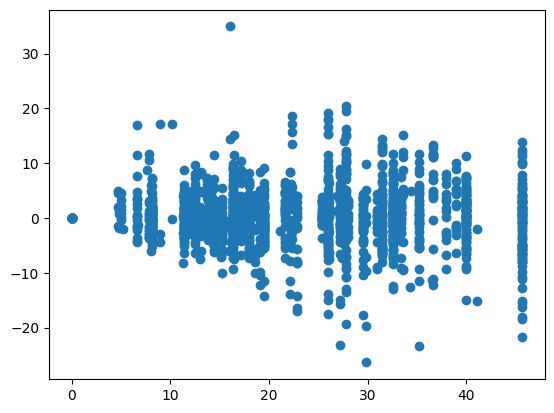

In [131]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d));

In [132]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [134]:
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9886624516557069
MSE : 1.7605223972027697
RMSE : 1.326846787388344
MAE : 0.8639386347227367
R2 : 0.9886624516557069
Adjusted R2 : 0.9885710724520108


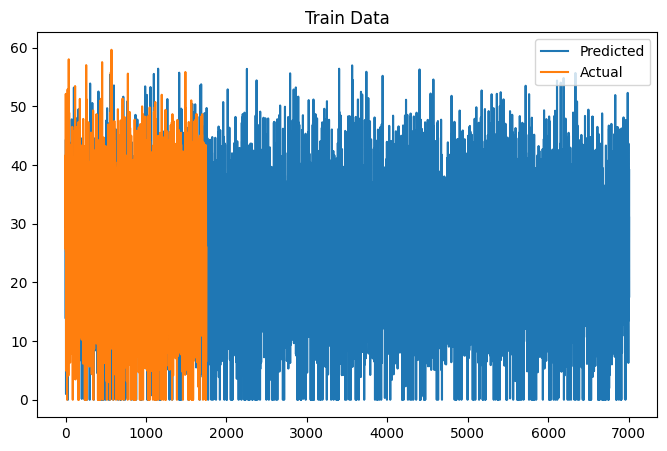

In [136]:
plt.figure(figsize=(8,5))
plt.title("Train Data")
plt.plot(y_pred_train_r)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [138]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.32773521216639
RMSE : 3.511087468600916
MAE : 2.314234641271974
R2 : 0.9199063910890098
Adjusted R2 : 0.9192608467454555


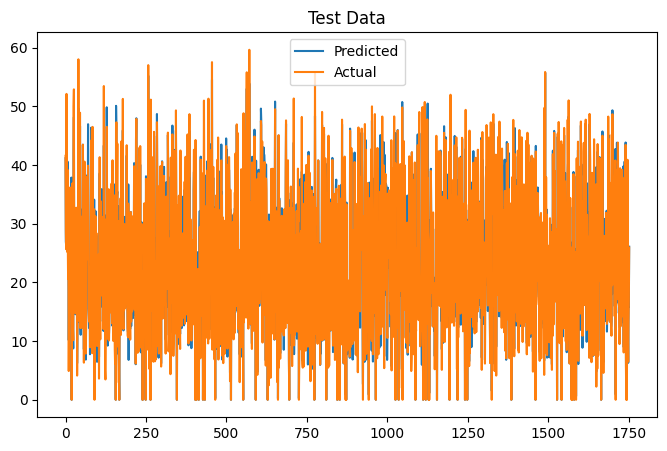

In [140]:
plt.figure(figsize=(8,5))
plt.title("Test Data")
plt.plot(y_pred_test_r)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

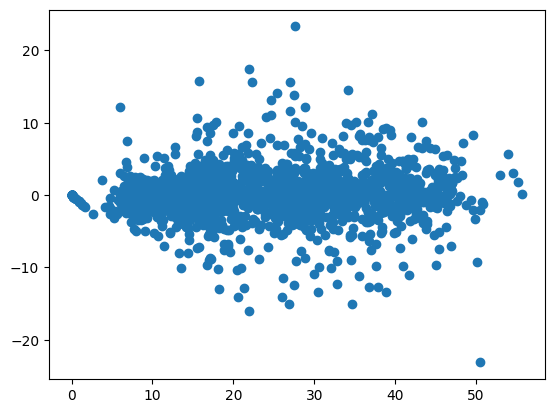

In [142]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r));

In [148]:
rf_model.feature_importances_

array([0.23904985, 0.27199149, 0.09318951, 0.01204136, 0.01358462,
       0.0210744 , 0.04905117, 0.05493965, 0.00130722, 0.05581322,
       0.00294023, 0.16338782, 0.01170387, 0.00992558])

In [149]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [150]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


In [151]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1                Temp_Celsius                0.27
0                        Hour                0.24
11            Functioning_Day                0.16
2         Humidity_Percentage                0.09
9                     Seasons                0.06
6   Solar_Radiation_MJ_per_m2                0.05
7                 Rainfall_mm                0.05
5      Dew_Point_Temp_Celsius                0.02
3              Wind_Speed_m_s                0.01
4              Visibility_10m                0.01
12                      month                0.01
13           weekdays_weekend                0.01
8                 Snowfall_cm                0.00
10                    Holiday                0.00

In [152]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [153]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

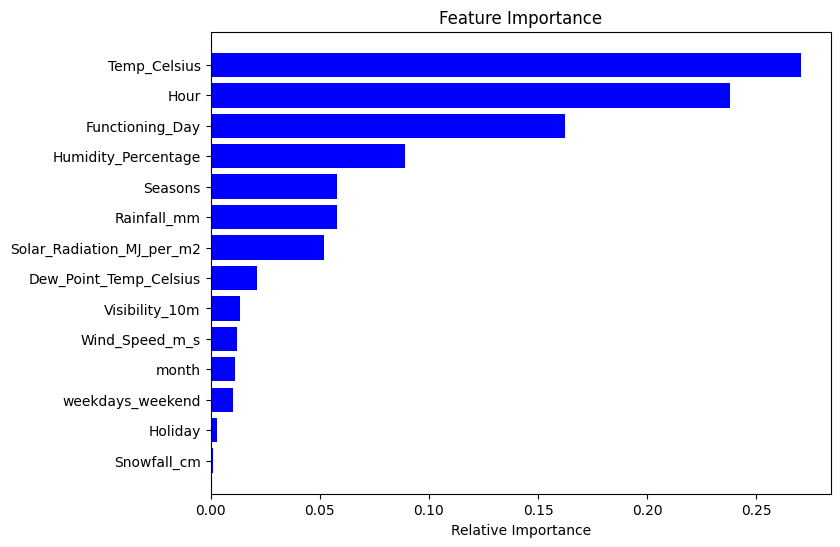

In [154]:
#Plot the figure
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [155]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Rented_Bike_Count', 'Hour', 'Temp_Celsius', 'Humidity_Percentage',
       'Wind_Speed_m_s', 'Visibility_10m', 'Dew_Point_Temp_Celsius',
       'Solar_Radiation_MJ_per_m2', 'Rainfall_mm', 'Snowfall_cm', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')